In [1]:
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

# Laplace equation 2D

$$ \nabla^{2} u(\rho, \phi) = \frac{\partial^{2} u(\rho, \phi)}{\partial \rho^{2}} + \frac{1}{\rho}\frac{\partial u(\rho, \phi) }{\partial \rho} + \frac{1}{\rho^{2}}\frac{\partial^{2} u(\rho, \phi) }{\partial \phi^{2}} = 0$$ 

In [2]:
N = 200
r = np.linspace(0.,1.,N)
phi = np.linspace(0.,2*np.pi,N)
dr = r[1] - r[0]
dphi = phi[1] - phi[0]
lambda_ = dr/dphi
print(lambda_)

0.15915494309189535


In [3]:
phi[1]

0.03157379551346526

In [4]:
def h1(phi):
    
    if phi < np.pi:
        return 20.
    else:
        return 10.

In [5]:
def InitT():
    
    T = np.zeros((N,N))
    
    for i in range(len(phi)):
        T[-1,i] = h1(phi[i])
        
    return T

In [6]:
T = InitT()
print(T)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [20. 20. 20. ... 10. 10. 10.]]


In [7]:
def GetRelaxation(Nit = 1000, omega = 1.8, tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(r)-1): # No tocar las fronteras
            for j in range(len(phi)):
                
                if j == len(phi) - 1: # Condicion de periodicidad
                    b = 1
                else:
                    b = j+1
                    
                c = 2. - dr / r[i] + 2*(lambda_/r[i])**2
                tmp = T[i+1,j] + (1-dr/r[i])*T[i-1,j] + (lambda_/r[i])**2*(T[i,b]+T[i,j-1])
                tmp /= c
                r1 = omega*(tmp-T[i,j])
                T[i,j] += r1
                
                if np.abs(r1) > dmax:
                    dmax = r1
                    
        if dmax < tolerancia:
            print(it)
            itmax = it
            break

In [8]:
GetRelaxation()

 76%|███████▌  | 757/1000 [03:49<01:13,  3.31it/s]

757


<IPython.core.display.Javascript object>


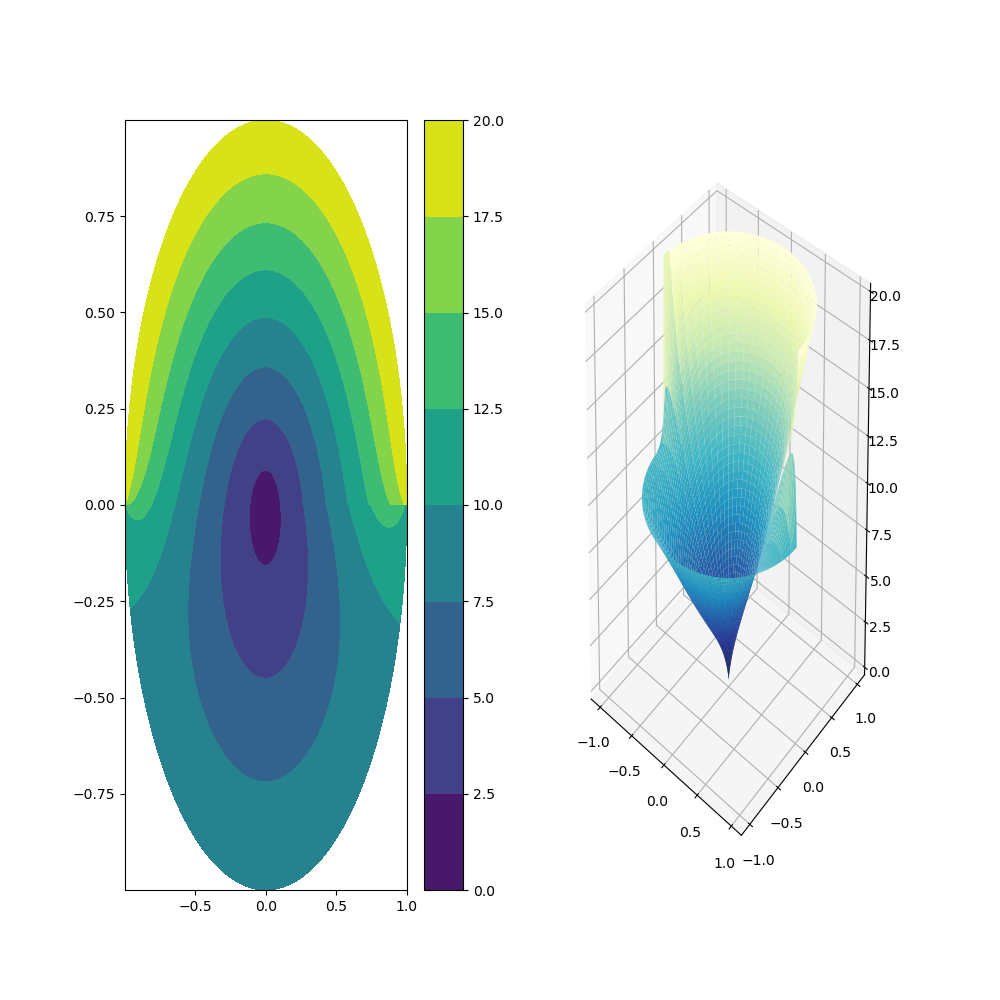

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2, projection = '3d', elev = 25, azim = -50)

R, Phi = np.meshgrid(r,phi)

X, Y = R*np.cos(Phi), R*np.sin(Phi)

c = ax.contourf(X,Y,T.T)
fig.colorbar(c,ax=ax)

ax1.plot_surface(X,Y,T.T,cmap=plt.cm.YlGnBu_r)

In [10]:
def GetGradient(T):
    
    M, N = T.shape
    
    U = np.zeros_like(T)
    V = np.zeros_like(T)
    
    u,v = np.gradient(T)
    
    
    for i in range(M):
        for j in range(N):
            U[i,j] = u[i,j]*np.cos(phi[j]) - v[i,j]*np.sin(phi[j])
            V[i,j] = u[i,j]*np.sin(phi[j]) + v[i,j]*np.cos(phi[j])
            
    return U.T,V.T

In [11]:
U,V = GetGradient(T)
U = - U
V = - V

<IPython.core.display.Javascript object>


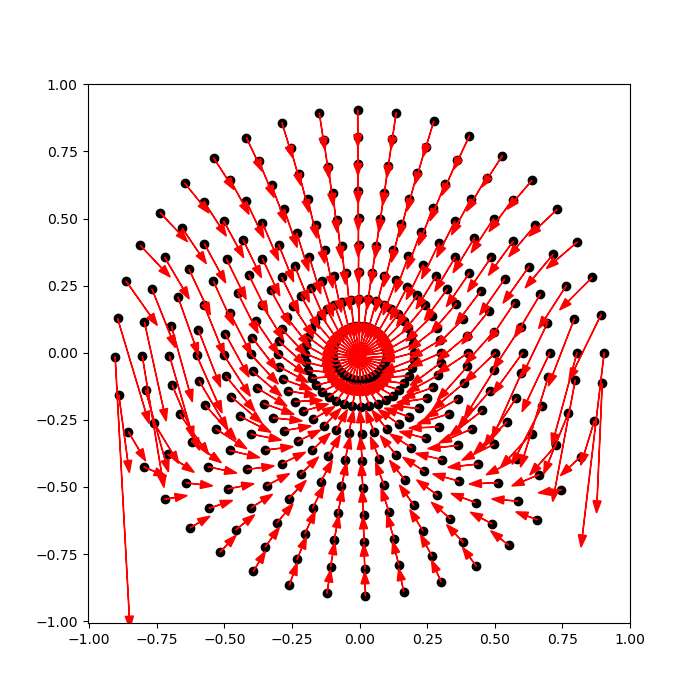

In [13]:
fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot(1,1,1)



for i in range(r.shape[0]):
    for j in range(10,phi.shape[0]):
        
         if i%5 == 0   and j%20==0:
                ax2.scatter(X[i,j],Y[i,j],color='k')
                ax2.arrow(X[i,j],Y[i,j],U[i,j],V[i,j],color='r', head_width=0.03, width=0.001)
                